# K means Clustering
- common clustering technique helps to solve many problems effciently
- k-means is an example of hard clustering, where every point belongs only to one cluster.
- it is an example of unsupervised learning
- clustering means grouping together similar data
- The idea here is to group similar data together.

# Motivational Problem - Pizza Parlour study
-  Given the list of locations of customers who frequently order pizza we want to find out the optimal locations of pizza parlour where they should be located.

Step-1: Initialise K no of Pizza parlour centres randomly.
step-2: Assign each Customer to the nearest Pizza centre , which means for every centre , we will assign a list of customer.
step 3: update the center location by taking mean Of customers assign to it.
step 4: Repeat step 2 and 3 until Convergence.


# Implementations

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs 

In [69]:
X,Y=make_blobs(n_samples=500,centers=5,random_state=3)

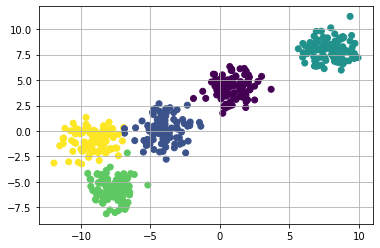

In [70]:
# Visualise
plt.grid(True)
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [71]:
# It is an unsupervised learning algorithm, we r not using y value in it , we will only used to find accuracy

# Algorithm

In [79]:
k=5
clusters={}
color=["green","red","blue","yellow","orange"]
for i in range(k):
   # center=np.random.randint(-10,10,2)
    center=10*(2*np.random.random((X.shape[1],))-1)
    points=[] # the no of locations we will add for rach cluster or we can say nearest locations of customers to parlour
    cluster={
        "center": center,
        "points": points,
        "color": color[i]
    }
    clusters[i]=cluster


In [73]:
#center=np.random.randint(-10,10,2)
#center=10*(2*np.random.random((X.shape[1],))-1)
#print(center)

In [74]:
# This function will help us to identify the distance between parlour and the customer
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [75]:
#v1=np.array([1,2])
#v2=np.array([3,5])
#print(distance(v1,v2))

# E step

In [88]:
def assignPointsToClusters(clusters): # E step
    for i in range(X.shape[0]):
        curr_cluster=X[i]
       # current_cluster=0
        dis=[]
        for j in range(k):
            d=distance(curr_cluster,clusters[j]['center'])
            dis.append(d)
        current_cluster=np.argmin(dis)
        clusters[current_cluster]['points'].append(curr_cluster)
def plotClusters(clusters):
    #assignPointsToClusters(clusters)
    for m in range(k):
        print(len(clusters[m]['points']))
        points=np.array(clusters[m]['points'])
        # plot the points
        try:
            plt.scatter(points[:,0],points[:,1],color=clusters[m]['color'])
        except:
            pass
        # plot the cluster centre
        uk=clusters[m]['center']
        plt.scatter(uk[0],uk[1],color='black',marker='*')
def update(clusters):# M step=> In this , we will update each cluster centre according to the mean of the points in it       
    for i in range(k):
        points=np.array(clusters[i]['points'])
        if points.shape[0]>0: # If a cluster has some non Zero points
            new_u=points.mean(axis=0) # mean along the column
            clusters[i]['center']=new_u # update the center
            clusters[i]['points']=[] # clear the list
#plotClusters(clusters)

0
652
80
356
912


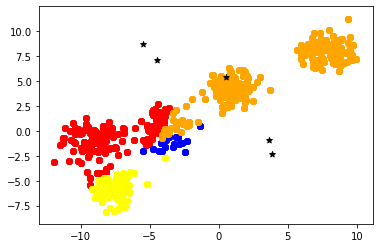

In [89]:
assignPointsToClusters(clusters)
plotClusters(clusters)
update(clusters)

# Explanation

so, we have to find out the nearest distance for each location to every cluster, so the first loop si for every training point, now we have stored our first training point in curr_clutster variable. and dis is a list in which there will be the distance of a training point from every cluster location will be placed. so j loop wil be run for every cluster and we will fill that distance list for every cluster. now we have to find out minimum distance of training point from every cluster.
and finally current cluster wil have that minimum value. and in the clusters dictionary that this cluster position , we will place that training point.
this entire process will have to be done for every cluster.


In [77]:
# K means Algorithm is also called Expectation Maximization Algorithm.

# E- step
- basically populates the list of points for every clusters
# M- step
- we basically change the centre of clusters by updating them to average of every locations.
- and clear the list to enable it to populate for the new centre in E step

0
106
97
99
198


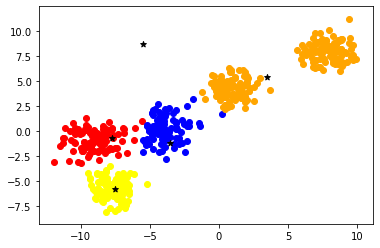

In [90]:
assignPointsToClusters(clusters)
plotClusters(clusters)
update(clusters)

0
103
111
99
187


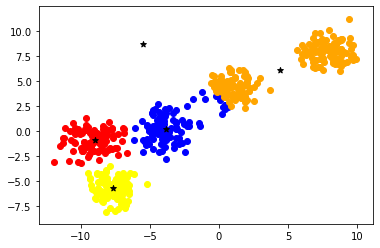

In [91]:
assignPointsToClusters(clusters)
plotClusters(clusters)
update(clusters)

0
104
120
99
177


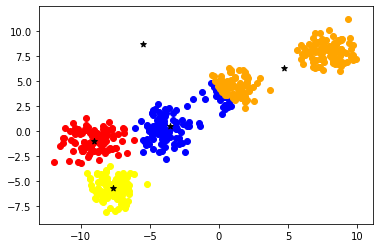

In [92]:
assignPointsToClusters(clusters)
plotClusters(clusters)
update(clusters)

0
104
137
99
160


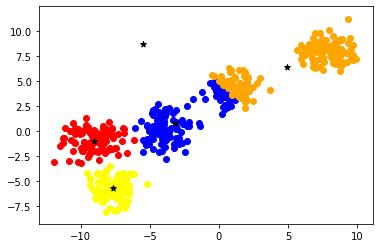

In [93]:
assignPointsToClusters(clusters)
plotClusters(clusters)
update(clusters)

0
106
156
99
139


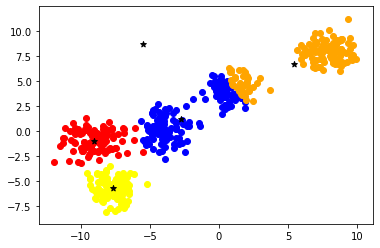

In [94]:
assignPointsToClusters(clusters)
plotClusters(clusters)
update(clusters)

0
111
172
99
118


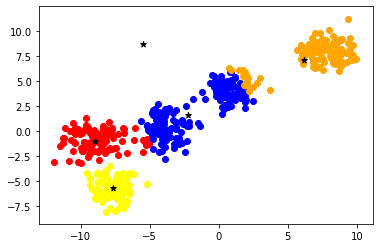

In [95]:
assignPointsToClusters(clusters)
plotClusters(clusters)
update(clusters)

0
117
180
100
103


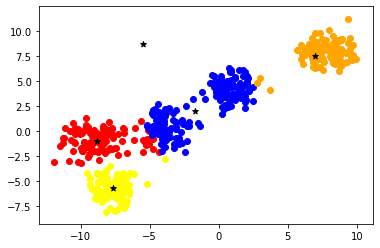

In [96]:
assignPointsToClusters(clusters)
plotClusters(clusters)
update(clusters)

0
126
174
100
100


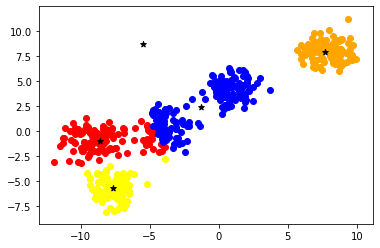

In [97]:
assignPointsToClusters(clusters)
plotClusters(clusters)
update(clusters)

0
136
164
100
100


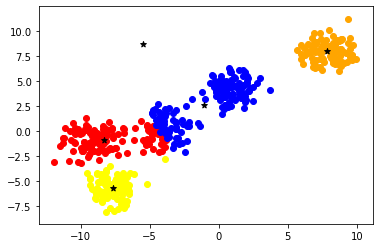

In [98]:
assignPointsToClusters(clusters)
plotClusters(clusters)
update(clusters)

0
144
157
99
100


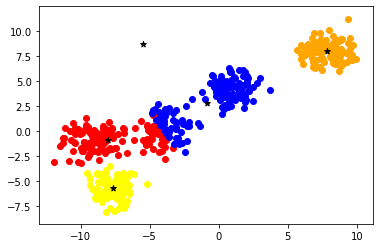

In [99]:
assignPointsToClusters(clusters)
plotClusters(clusters)
update(clusters)

0
159
142
99
100


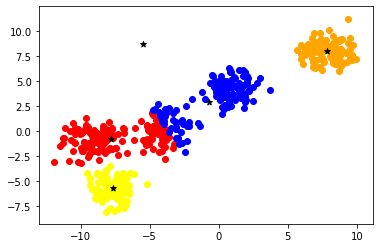

In [100]:
assignPointsToClusters(clusters)
plotClusters(clusters)
update(clusters)

0
175
124
101
100


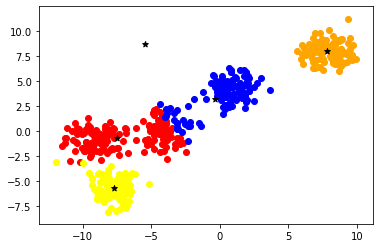

In [101]:
assignPointsToClusters(clusters)
plotClusters(clusters)
update(clusters)

0
186
111
103
100


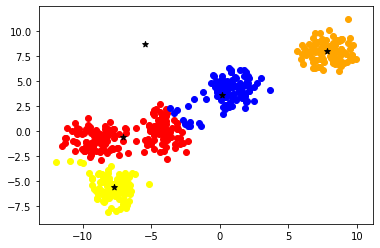

In [102]:
assignPointsToClusters(clusters)
plotClusters(clusters)
update(clusters)

0
187
108
105
100


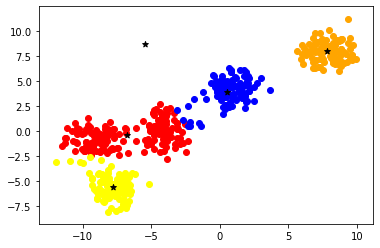

In [103]:
assignPointsToClusters(clusters)
plotClusters(clusters)
update(clusters)

0
189
106
105
100


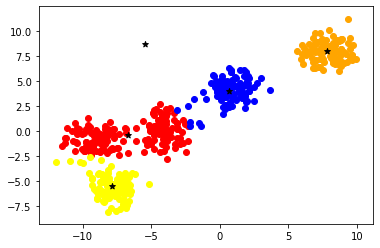

In [104]:
assignPointsToClusters(clusters)
plotClusters(clusters)
update(clusters)

# K means++
-  K means is quite sensitive to initialistaion, if the init is not good, our algorithm will not able to make desired number of clusters.
-  To overcome this Problem , we use this technique called  K means++ which choses initial centres so that they are statistically closed to final ones .
- Th method is default choice for sklearn, so we will use it directly without going into too much maths.!